In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error



In [2]:
df = pd.read_csv('feature-enginering/preprocessed_data.csv')
df.head()

,keyword,Title,Reviews,Review_points,Address,Country,City,State,Website,Phone,...,Populations_2023,Competitor,Review_rate,Average_review_points,Average_reviews,Max_reviews,Min_reviews,Success_rate,Success_rate_category_minor,Success_rate_category_major
0,Toko Makanan Malang,Toko Oen Malang,7391.0,3.9,"Jl. Jenderal Basuki Rahmat No.5, Kauman, Kec. ...",ID,Malang City,East Java,https://tokooenmalang.com/,+62 341 364052,...,9063,2,3724.75,4.43,1342.15,7391.0,2.0,1862.38,1862.38,0.0
1,Toko Makanan Malang,Oleh Oleh Khas Malang - tokodimas,313.0,4.9,"Blok D-No.169B, Pondok Harapan Indah (POHARIN,...",ID,Malang City,East Java,https://lynk.id/tokodimas,+62 812-5256-708,...,19668,2,340.15,4.62,502.83,1808.0,45.0,170.08,170.08,0.0
2,Toko Makanan Malang,Mochi dan Onde Malang by Warung Agrin Takeaway...,1983.0,4.9,"D. Maninjau Sel. Dalam VIII No.D3C13, Sawojaja...",ID,Malang City,East Java,http://www.warungagrin.com/,+62 821-4198-8031,...,11781,3,1346.15,4.58,367.15,2077.0,1.0,448.72,448.72,0.0
3,Kuliner Malang Terbaik,Rawon Nguling Restaurant,7541.0,4.5,"Jl. Zainul Arifin No.62, RT.01/RW.01, Kiduldal...",ID,Malang City,East Java,Tidak Ada,+62 341 324684,...,6240,2,4697.40,4.40,1087.93,7541.0,2.0,2348.70,2348.70,0.0
4,Toko Makanan Malang,Makku Frozen Food Malang,115.0,4.9,"Jl. Soekarno Hatta No.A7, Mojolangu, Kec. Lowo...",ID,Malang City,East Java,https://www.tokopedia.com/makkufrozen,+62 819-0890-0124,...,19407,3,358.85,4.55,621.97,8486.0,1.0,119.62,119.62,0.0


In [3]:
df.columns

Index(['keyword', 'Title', 'Reviews', 'Review_points', 'Address', 'Country',
       'City', 'State', 'Website', 'Phone', 'Latitude', 'Longitude',
       'Category', 'Kecamatan', 'Kelurahan', 'Pasar_Amount', 'Landmark_Amount',
       'Price_Range_Rp 100–125K', 'Price_Range_Rp 150–175K',
       'Price_Range_Rp 1–25,000', 'Price_Range_Rp 1–50,000',
       'Price_Range_Rp 250,000+', 'Price_Range_Rp 25–50K',
       'Price_Range_Rp 25–75K', 'Price_Range_Rp 50–100K',
       'Price_Range_Rp 50–75K', 'Price_Range_Rp 75–100K',
       'Busiest_time_Monday', 'Busiest_time_Tuesday', 'Busiest_time_Wednesday',
       'Busiest_time_Thursday', 'Busiest_time_Friday', 'Busiest_time_Saturday',
       'Busiest_time_Sunday', 'Populations_2023', 'Competitor', 'Review_rate',
       'Average_review_points', 'Average_reviews', 'Max_reviews',
       'Min_reviews', 'Success_rate', 'Success_rate_category_minor',
       'Success_rate_category_major'],
      dtype='object')

In [4]:
cat_features = ['Kecamatan', 'Kelurahan', 'Category']

encoder = OrdinalEncoder()
df[cat_features] = encoder.fit_transform(df[cat_features])
df.head()

,keyword,Title,Reviews,Review_points,Address,Country,City,State,Website,Phone,...,Populations_2023,Competitor,Review_rate,Average_review_points,Average_reviews,Max_reviews,Min_reviews,Success_rate,Success_rate_category_minor,Success_rate_category_major
0,Toko Makanan Malang,Toko Oen Malang,7391.0,3.9,"Jl. Jenderal Basuki Rahmat No.5, Kauman, Kec. ...",ID,Malang City,East Java,https://tokooenmalang.com/,+62 341 364052,...,9063,2,3724.75,4.43,1342.15,7391.0,2.0,1862.38,1862.38,0.0
1,Toko Makanan Malang,Oleh Oleh Khas Malang - tokodimas,313.0,4.9,"Blok D-No.169B, Pondok Harapan Indah (POHARIN,...",ID,Malang City,East Java,https://lynk.id/tokodimas,+62 812-5256-708,...,19668,2,340.15,4.62,502.83,1808.0,45.0,170.08,170.08,0.0
2,Toko Makanan Malang,Mochi dan Onde Malang by Warung Agrin Takeaway...,1983.0,4.9,"D. Maninjau Sel. Dalam VIII No.D3C13, Sawojaja...",ID,Malang City,East Java,http://www.warungagrin.com/,+62 821-4198-8031,...,11781,3,1346.15,4.58,367.15,2077.0,1.0,448.72,448.72,0.0
3,Kuliner Malang Terbaik,Rawon Nguling Restaurant,7541.0,4.5,"Jl. Zainul Arifin No.62, RT.01/RW.01, Kiduldal...",ID,Malang City,East Java,Tidak Ada,+62 341 324684,...,6240,2,4697.40,4.40,1087.93,7541.0,2.0,2348.70,2348.70,0.0
4,Toko Makanan Malang,Makku Frozen Food Malang,115.0,4.9,"Jl. Soekarno Hatta No.A7, Mojolangu, Kec. Lowo...",ID,Malang City,East Java,https://www.tokopedia.com/makkufrozen,+62 819-0890-0124,...,19407,3,358.85,4.55,621.97,8486.0,1.0,119.62,119.62,0.0


In [5]:
# resampling
from imblearn.over_sampling import SMOTE

X_rs = df.drop(columns=['keyword', 'Title', 'Reviews', 'Address', 'Country', 'City', 'State', 'Website', 'Phone', 'Latitude', 'Longitude', 'Busiest_time_Monday', 'Busiest_time_Tuesday', 'Busiest_time_Wednesday','Busiest_time_Thursday', 'Busiest_time_Friday', 'Busiest_time_Saturday','Busiest_time_Sunday'])
y_rs = df['Category']

smote = SMOTE(random_state=42, k_neighbors=2)

X_resampled, y_resampled = smote.fit_resample(X_rs, y_rs)

X_resampled = pd.DataFrame(X_resampled, columns=X_rs.columns)
y_resampled = pd.Series(y_resampled)

X_resampled.head()

,Review_points,Category,Kecamatan,Kelurahan,Pasar_Amount,Landmark_Amount,Price_Range_Rp 100–125K,Price_Range_Rp 150–175K,"Price_Range_Rp 1–25,000","Price_Range_Rp 1–50,000",...,Populations_2023,Competitor,Review_rate,Average_review_points,Average_reviews,Max_reviews,Min_reviews,Success_rate,Success_rate_category_minor,Success_rate_category_major
0,3.9,19.0,2.0,14.0,10.0,6.0,False,False,False,False,...,9063,2,3724.75,4.43,1342.15,7391.0,2.0,1862.38,1862.38,0.0
1,4.9,16.0,4.0,12.0,6.0,4.0,False,False,True,False,...,19668,2,340.15,4.62,502.83,1808.0,45.0,170.08,170.08,0.0
2,4.9,16.0,1.0,16.0,10.0,10.0,False,False,True,False,...,11781,3,1346.15,4.58,367.15,2077.0,1.0,448.72,448.72,0.0
3,4.5,11.0,2.0,18.0,4.0,8.0,False,False,False,False,...,6240,2,4697.40,4.40,1087.93,7541.0,2.0,2348.70,2348.70,0.0
4,4.9,3.0,3.0,21.0,33.0,79.0,False,False,True,False,...,19407,3,358.85,4.55,621.97,8486.0,1.0,119.62,119.62,0.0


In [6]:
# invers encoding ordinal encoder
X_resampled[cat_features] = encoder.inverse_transform(X_resampled[cat_features])
X_resampled.head()

,Review_points,Category,Kecamatan,Kelurahan,Pasar_Amount,Landmark_Amount,Price_Range_Rp 100–125K,Price_Range_Rp 150–175K,"Price_Range_Rp 1–25,000","Price_Range_Rp 1–50,000",...,Populations_2023,Competitor,Review_rate,Average_review_points,Average_reviews,Max_reviews,Min_reviews,Success_rate,Success_rate_category_minor,Success_rate_category_major
0,3.9,Toko,Klojen,Kauman,10.0,6.0,False,False,False,False,...,9063,2,3724.75,4.43,1342.15,7391.0,2.0,1862.38,1862.38,0.0
1,4.9,Snack,Sukun,Karangbesuki,6.0,4.0,False,False,True,False,...,19668,2,340.15,4.62,502.83,1808.0,45.0,170.08,170.08,0.0
2,4.9,Snack,Kedungkandang,Kedungkandang,10.0,10.0,False,False,True,False,...,11781,3,1346.15,4.58,367.15,2077.0,1.0,448.72,448.72,0.0
3,4.5,Rawon,Klojen,Kiduldalem,4.0,8.0,False,False,False,False,...,6240,2,4697.40,4.40,1087.93,7541.0,2.0,2348.70,2348.70,0.0
4,4.9,Frozen Food,Lowokwaru,Lowokwaru,33.0,79.0,False,False,True,False,...,19407,3,358.85,4.55,621.97,8486.0,1.0,119.62,119.62,0.0


In [7]:
X_resampled['Review_rate'].value_counts()

Review_rate
2338.500000     134
10453.095369    115
2118.390739     112
423.750000      101
19706.000000    101
               ... 
321.778513        1
1880.208192       1
1757.741753       1
79.596163         1
4.236381          1
Name: count, Length: 1107, dtype: int64

In [8]:
X_resampled.columns

Index(['Review_points', 'Category', 'Kecamatan', 'Kelurahan', 'Pasar_Amount',
       'Landmark_Amount', 'Price_Range_Rp 100–125K', 'Price_Range_Rp 150–175K',
       'Price_Range_Rp 1–25,000', 'Price_Range_Rp 1–50,000',
       'Price_Range_Rp 250,000+', 'Price_Range_Rp 25–50K',
       'Price_Range_Rp 25–75K', 'Price_Range_Rp 50–100K',
       'Price_Range_Rp 50–75K', 'Price_Range_Rp 75–100K', 'Populations_2023',
       'Competitor', 'Review_rate', 'Average_review_points', 'Average_reviews',
       'Max_reviews', 'Min_reviews', 'Success_rate',
       'Success_rate_category_minor', 'Success_rate_category_major'],
      dtype='object')

In [12]:
features_columns = ['Category', 'Kecamatan', 'Kelurahan', 'Pasar_Amount', 'Landmark_Amount', 'Populations_2023', 'Competitor', 'Review_rate', 'Average_review_points', 'Average_reviews', 'Max_reviews', 'Min_reviews', 'Success_rate', 'Success_rate_category_minor', 'Success_rate_category_major']

X = X_resampled[features_columns]
y = X_resampled['Review_points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3496, 15), (3496,), (389, 15), (389,))

In [13]:
cat_features = ['Kecamatan', 'Kelurahan', 'Category']
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train[cat_features] = encoder.fit_transform(X_train[cat_features])
X_test[cat_features] = encoder.transform(X_test[cat_features])

X_train.head()

,Category,Kecamatan,Kelurahan,Pasar_Amount,Landmark_Amount,Populations_2023,Competitor,Review_rate,Average_review_points,Average_reviews,Max_reviews,Min_reviews,Success_rate,Success_rate_category_minor,Success_rate_category_major
358,1.0,2.0,14.0,10.00000,6.000000,9063,2,431.100000,4.430000,1342.150000,7391.000000,2.000000,215.550000,215.550000,0.00
2854,13.0,2.0,18.0,23.34504,48.355997,15064,1,165.918907,4.499626,924.287777,8026.339962,1.419781,165.918907,165.918907,0.00
299,16.0,2.0,19.0,45.00000,20.000000,5928,30,7237.595369,4.530000,847.210000,21451.000000,1.000000,241.250000,0.000000,241.25
1953,6.0,2.0,19.0,45.00000,20.000000,5928,15,2428.645369,4.530000,847.210000,21451.000000,1.000000,161.910000,0.000000,161.91
3756,19.0,2.0,19.0,45.00000,20.000000,5928,13,2118.390739,4.530000,847.210000,21451.000000,1.000000,162.950000,0.000000,162.95


In [15]:
# grid search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_, grid_search.best_score_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.4s[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.6s

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total ti

/root/miniconda3/envs/pbl/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100} 0.4179621118006291


Mean Squared Error: 0.05220275659799302
R2 Score: 0.46729999043162895
Mean Absolute Error: 0.14537842919477592
Mean Squared Log Error: 0.0019364475588666912


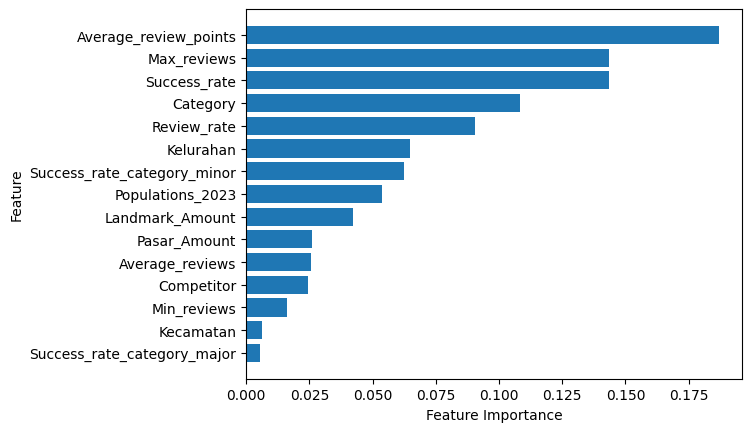

In [43]:
from sklearn.ensemble import RandomForestRegressor
# 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100
model = RandomForestRegressor(max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
model.fit(X_train, y_train)

# evaluate
y_pred = model.predict(X_test)
df_pred = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
df_pred.to_csv('prediction.csv', index=False)


print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Log Error:', mean_squared_log_error(y_test, y_pred))


feature_importance = model.feature_importances_
sorted_idx = feature_importance.argsort()

plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

plt.show()



In [33]:
X_train

,Category,Kecamatan,Kelurahan,Pasar_Amount,Landmark_Amount,Populations_2023,Competitor,Review_rate,Average_review_points,Average_reviews,Max_reviews,Min_reviews,Success_rate,Success_rate_category_minor,Success_rate_category_major
358,1.0,2.0,14.0,10.000000,6.000000,9063,2,431.100000,4.430000,1342.150000,7391.000000,2.000000,215.550000,215.550000,0.00
2854,13.0,2.0,18.0,23.345040,48.355997,15064,1,165.918907,4.499626,924.287777,8026.339962,1.419781,165.918907,165.918907,0.00
299,16.0,2.0,19.0,45.000000,20.000000,5928,30,7237.595369,4.530000,847.210000,21451.000000,1.000000,241.250000,0.000000,241.25
1953,6.0,2.0,19.0,45.000000,20.000000,5928,15,2428.645369,4.530000,847.210000,21451.000000,1.000000,161.910000,0.000000,161.91
3756,19.0,2.0,19.0,45.000000,20.000000,5928,13,2118.390739,4.530000,847.210000,21451.000000,1.000000,162.950000,0.000000,162.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1.0,0.0,8.0,27.450767,10.106063,8893,2,2215.877174,4.476193,994.510195,7066.621041,1.486742,1107.936021,1107.936021,0.00
1294,2.0,3.0,21.0,33.000000,79.000000,19407,3,3625.900000,4.550000,621.970000,8486.000000,1.000000,1208.630000,1208.630000,0.00
860,8.0,3.0,21.0,33.000000,79.000000,19407,29,11246.750000,4.550000,621.970000,8486.000000,1.000000,387.820000,0.000000,387.82
3507,17.0,2.0,19.0,45.000000,20.000000,5928,6,3557.150000,4.530000,847.210000,21451.000000,1.000000,592.860000,0.000000,592.86


In [27]:

"""create_features
Ambil data berdasarkan kelurahan dan category yang ingin diprediksi
"""
def create_features(df, kelurahan, category, kecamatan):
    features = {
        'Pasar_Amount' : df[df['Kelurahan'] == kelurahan]['Pasar_Amount'].values[0],
        'Landmark_Amount' : df[df['Kelurahan'] == kelurahan]['Landmark_Amount'].values[0],
        'Populations_2023' : df[df['Kelurahan'] == kelurahan]['Populations_2023'].values[0],
        'Competitor' : df[(df['Kelurahan'] == kelurahan) & (df['Category'] == category)]['Competitor'].values[0],
        'Review_rate' : df[(df['Kelurahan'] == kelurahan) & (df['Category'] == category)]['Review_rate'].values[0],
        'Average_review_points' : df[df['Kelurahan'] == kelurahan]['Average_review_points'].values[0],
        'Average_reviews' : df[df['Kelurahan'] == kelurahan]['Average_reviews'].values[0],
        'Max_reviews' : df[df['Kelurahan'] == kelurahan]['Max_reviews'].values[0],
        'Min_reviews' : df[df['Kelurahan'] == kelurahan]['Min_reviews'].values[0],
        'Success_rate' : df[df['Kelurahan'] == kelurahan]['Success_rate'].values[0],
        'Success_rate_category_minor' : df[(df['Kelurahan'] == kelurahan) & (df['Category'] == category)]['Success_rate_category_minor'].values[0],
        'Success_rate_category_major' : df[(df['Kecamatan'] == kecamatan) & (df['Category'] == category)]['Success_rate_category_major'].values[0],
        'Kecamatan' : kecamatan,
        'Kelurahan' : kelurahan,
        'Category' : category
    }
    return features

features = create_features(X_resampled, 'Klojen', 'Minuman', 'Klojen')
features

{'Pasar_Amount': 45.0,
 'Landmark_Amount': 20.0,
 'Populations_2023': 5928,
 'Competitor': 48,
 'Review_rate': 15239.695369284877,
 'Average_review_points': 4.53,
 'Average_reviews': 847.21,
 'Max_reviews': 21451.0,
 'Min_reviews': 1.0,
 'Success_rate': 1014.95,
 'Success_rate_category_minor': 0.0,
 'Success_rate_category_major': 317.49,
 'Kecamatan': 'Klojen',
 'Kelurahan': 'Klojen',
 'Category': 'Minuman'}

In [39]:
def generate_features_per_kelurahan(df, kecamatan, category):
    filtered_df = df[(df['Kecamatan'] == kecamatan) & (df['Category'] == category)]
    kelurahan = filtered_df['Kelurahan'].unique()
    
    features = []
    for kel in kelurahan:
        if not filtered_df[filtered_df['Kelurahan'] == kel].empty:
            features.append(create_features(filtered_df, kel, category, kecamatan))
    
    return features

features = generate_features_per_kelurahan(X_resampled, 'Klojen', 'Minuman')
features

[{'Pasar_Amount': 45.0,
  'Landmark_Amount': 20.0,
  'Populations_2023': 5928,
  'Competitor': 48,
  'Review_rate': 15239.695369284877,
  'Average_review_points': 4.53,
  'Average_reviews': 847.21,
  'Max_reviews': 21451.0,
  'Min_reviews': 1.0,
  'Success_rate': 317.49,
  'Success_rate_category_minor': 0.0,
  'Success_rate_category_major': 317.49,
  'Kecamatan': 'Klojen',
  'Kelurahan': 'Klojen',
  'Category': 'Minuman'},
 {'Pasar_Amount': 10.0,
  'Landmark_Amount': 6.0,
  'Populations_2023': 9063,
  'Competitor': 15,
  'Review_rate': 5082.0,
  'Average_review_points': 4.43,
  'Average_reviews': 1342.15,
  'Max_reviews': 7391.0,
  'Min_reviews': 2.0,
  'Success_rate': 338.8,
  'Success_rate_category_minor': 0.0,
  'Success_rate_category_major': 317.49,
  'Kecamatan': 'Klojen',
  'Kelurahan': 'Kauman',
  'Category': 'Minuman'},
 {'Pasar_Amount': 3.0,
  'Landmark_Amount': 1.0,
  'Populations_2023': 12918,
  'Competitor': 3,
  'Review_rate': 492.15,
  'Average_review_points': 4.54,
  'Av

In [41]:
def predict(features):
    df = pd.DataFrame(features)
    df[cat_features] = encoder.transform(df[cat_features])
    return model.predict(df[features_columns])

predict(features)

def predict_category(df, kecamatan, category):
    features = generate_features_per_kelurahan(df, kecamatan, category)
    return predict(features)

predict_category(X_resampled, 'Klojen', 'Minuman')

array([4.62353491, 4.40871456, 4.70494658, 4.51500899])

In [44]:
# save the model
import joblib
joblib.dump(model, 'model-v1.pkl')

['model-v1.pkl']